In [4]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#data = Path('./Resources/combined_data.csv')
data = Path('./Resources/combinedtop5.csv')
df = pd.read_csv(data)
df.head()

,order_name,family_name,datetime,individuals,tempmax,tempmin,temp_daily,humidity
0,COLEOPTERA,CARABIDAE,2003-07-20,2,76.9,60.9,69.9,69.9
1,COLEOPTERA,CARABIDAE,2000-06-21,3,86.0,64.1,75.6,67.5
2,COLEOPTERA,CARABIDAE,2007-06-10,1,81.7,60.4,71.9,55.4
3,COLEOPTERA,CARABIDAE,1992-07-02,1,71.2,58.8,65.5,59.2
4,COLEOPTERA,CARABIDAE,1993-05-23,1,73.3,55.2,63.3,66.8


In [6]:
y = df["individuals"]
X = df.loc[:,["tempmax"]]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
X_train.shape

(23368, 1)

In [8]:
#Fitting Simple Linear regression data model to train data set
from sklearn.linear_model import LinearRegression
classifier=LinearRegression()
classifier.fit(X_train,y_train)

LinearRegression()

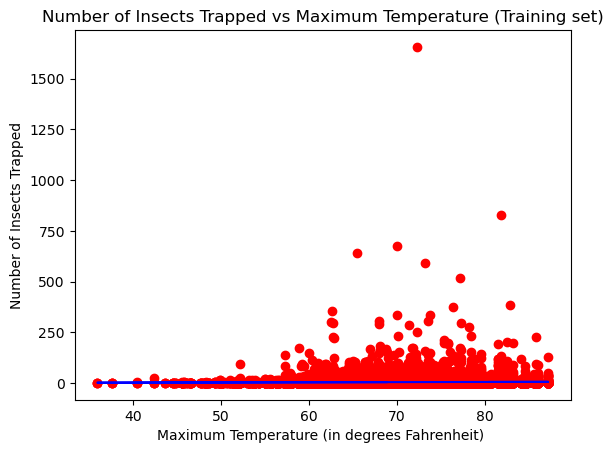

In [9]:
# Visualising the Training set results in a scatter plot
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, classifier.predict(X_train), color = 'blue')
plt.title('Number of Insects Trapped vs Maximum Temperature (Training set)')
plt.xlabel('Maximum Temperature (in degrees Fahrenheit) ')
plt.ylabel('Number of Insects Trapped')
plt.show()

In [10]:
y = df["individuals"]
X = df.loc[:,["tempmin"]]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
X_train.shape

(23368, 1)

In [12]:
#Fitting Simple Linear regression data model to train data set
from sklearn.linear_model import LinearRegression
classifier=LinearRegression()
classifier.fit(X_train,y_train)

LinearRegression()

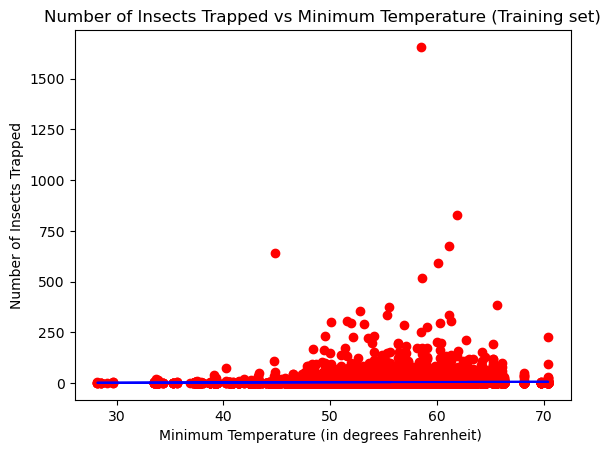

In [13]:
# Visualising the Training set results in a scatter plot
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, classifier.predict(X_train), color = 'blue')
plt.title('Number of Insects Trapped vs Minimum Temperature (Training set)')
plt.xlabel('Minimum Temperature (in degrees Fahrenheit) ')
plt.ylabel('Number of Insects Trapped')
plt.show()

In [14]:
y = df["individuals"]
X = df.loc[:,["temp_daily"]]

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
X_train.shape

(23368, 1)

In [16]:
#Fitting Simple Linear regression data model to train data set
from sklearn.linear_model import LinearRegression
classifier=LinearRegression()
classifier.fit(X_train,y_train)

LinearRegression()

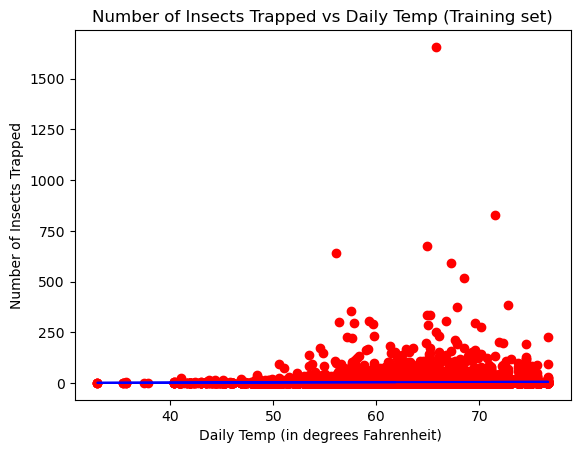

In [17]:
# Visualising the Training set results in a scatter plot
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, classifier.predict(X_train), color = 'blue')
plt.title('Number of Insects Trapped vs Daily Temp (Training set)')
plt.xlabel('Daily Temp (in degrees Fahrenheit) ')
plt.ylabel('Number of Insects Trapped')
plt.show()

In [32]:
y = df["individuals"]
X = df.loc[:,["humidity"]]

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
X_train.shape

(23368, 1)

In [34]:
#Fitting Simple Linear regression data model to train data set
from sklearn.linear_model import LinearRegression
classifier=LinearRegression()
classifier.fit(X_train,y_train)

LinearRegression()

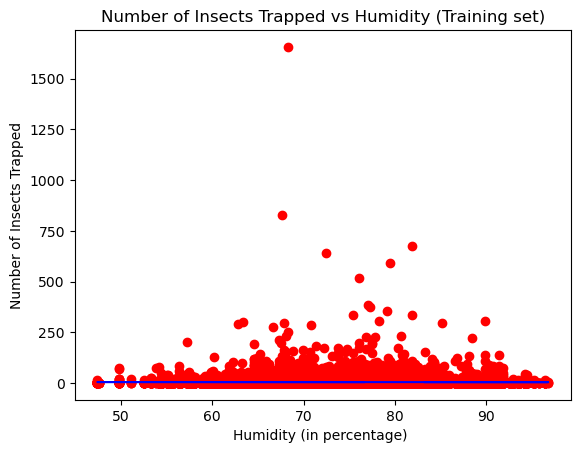

In [35]:
# Visualising the Training set results in a scatter plot
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, classifier.predict(X_train), color = 'blue')
plt.title('Number of Insects Trapped vs Humidity (Training set)')
plt.xlabel('Humidity (in percentage) ')
plt.ylabel('Number of Insects Trapped')
plt.show()

In [23]:
# Segment the features from the target
y = df["individuals"]
X = df.drop(columns=["order_name", "family_name", "datetime", "individuals", "tempmax","tempmin"])

In [24]:
# Use the train_test_split function to create training and testing subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
X_train.shape

(24926, 2)

In [25]:
# Instantiate a linear SVM model
from sklearn.svm import SVC
model = SVC(kernel='linear')

In [26]:
# Fit the data
model.fit(X_train, y_train)

SVC(kernel='linear')

In [27]:
# Make predictions using the test data
y_pred = model.predict(X_test)
results = pd.DataFrame({
    "Prediction": y_pred, 
    "Actual": y_test
}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,1,2
1,1,2
2,1,2
3,1,15
4,1,3


In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5012836970474968

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[3124,    0,    0, ...,    0,    0,    0],
       [ 996,    0,    0, ...,    0,    0,    0],
       [ 510,    0,    0, ...,    0,    0,    0],
       ...,
       [   1,    0,    0, ...,    0,    0,    0],
       [   1,    0,    0, ...,    0,    0,    0],
       [   1,    0,    0, ...,    0,    0,    0]], dtype=int64)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67      3124
           2       0.00      0.00      0.00       996
           3       0.00      0.00      0.00       510
           4       0.00      0.00      0.00       320
           5       0.00      0.00      0.00       236
           6       0.00      0.00      0.00       154
           7       0.00      0.00      0.00       130
           8       0.00      0.00      0.00       104
           9       0.00      0.00      0.00        69
          10       0.00      0.00      0.00        74
          11       0.00      0.00      0.00        48
          12       0.00      0.00      0.00        34
          13       0.00      0.00      0.00        32
          14       0.00      0.00      0.00        28
          15       0.00      0.00      0.00        28
          16       0.00      0.00      0.00        20
          17       0.00      0.00      0.00        25
          18       0.00    

c:\Users\Andrea\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Andrea\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Andrea\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif